In [17]:
import numpy as np
import matplotlib.pyplot as plt

from copy import deepcopy
from imageio.simpleitk_reader_writer import SimpleITKIO
from curve_util import find_largest_component, extract_skeleton, find_longest_path, smooth_binary_line, visualize_results

seg_path = "Z:/data2/jwkong/nnunet_dataset/nnUNet_raw/Dataset007_Skull/labelsTr/case_0555.nii.gz"
sitkio = SimpleITKIO()
seg_data, properties = sitkio.read_seg(seg_fname = seg_path)
seg_data = np.squeeze(seg_data)
maxilla_data = deepcopy(seg_data)
mandible_data = deepcopy(seg_data)

In [18]:
total_length = seg_data.shape[0] * properties['spacing'][0]
if total_length >=130:
    top = 280
    middle = 340
    bottom = 410    

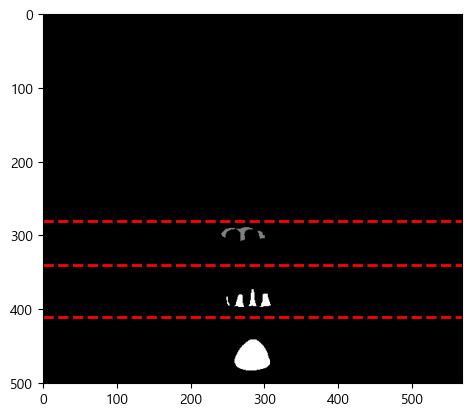

In [19]:
tr_data = np.transpose(seg_data, (1,0,2))
plt.imshow(tr_data[120],'gray')
plt.axhline(top, 0, 1, color='red', linestyle='--', linewidth=2)
plt.axhline(middle, 0, 1, color='red', linestyle='--', linewidth=2)
plt.axhline(bottom, 0, 1, color='red', linestyle='--', linewidth=2)

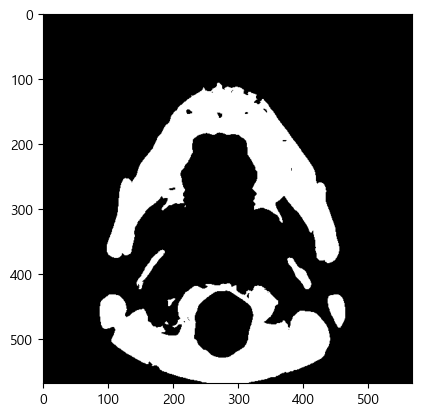

In [20]:
tmp_data = deepcopy(seg_data)
tmp_data[(tmp_data != 1) & (tmp_data != 2)] = 0
tmp_data[tmp_data == 2] = 1

tmp_data = tmp_data[top:bottom]

tmp_mask = np.max(tmp_data, axis=0)

plt.imshow(tmp_mask,'gray')


In [21]:
maxilla_data[maxilla_data != 1] = 0
mandible_data[mandible_data != 2] = 0
mandible_data[mandible_data == 2] = 1

maxilla_data = maxilla_data[top: middle]
mandible_data = mandible_data[middle:bottom]

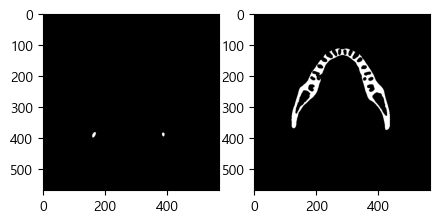

In [22]:
fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(maxilla_data[40], 'gray')
ax[1].imshow(mandible_data[50], 'gray')

In [23]:
maxilla_image = np.max(maxilla_data, axis=0)
maxilla_mask = np.zeros_like(maxilla_image, dtype=np.float32)
maxilla_mask[:400] = maxilla_image[:400]

mandible_mask = np.max(mandible_data, axis=0)

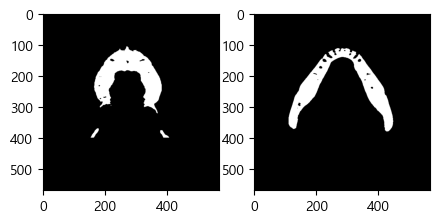

In [24]:
fig, ax = plt.subplots(1,2, figsize=(5,5))
ax[0].imshow(maxilla_mask, 'gray')
ax[1].imshow(mandible_mask, 'gray')

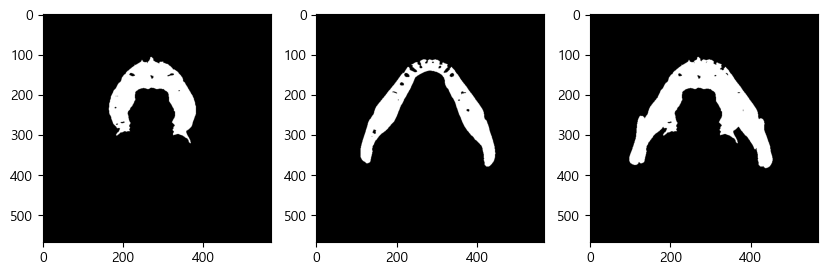

In [25]:
maxilla_result, _ = find_largest_component(maxilla_mask)
mandible_result, _ = find_largest_component(mandible_mask)
tmp_result, _ = find_largest_component(tmp_mask)

fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(maxilla_result, 'gray')
ax[1].imshow(mandible_result, 'gray')
ax[2].imshow(tmp_result,'gray')

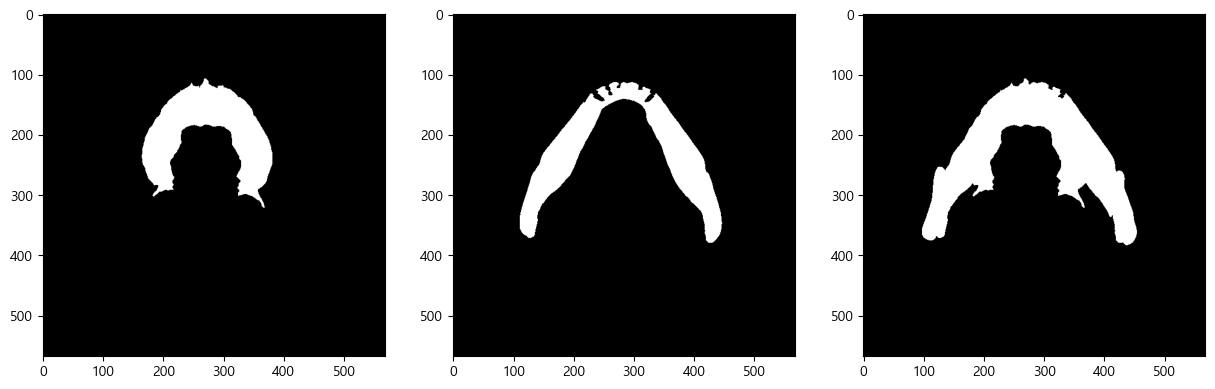

In [26]:
import scipy.ndimage as ndi
maxilla_fill = ndi.binary_fill_holes(maxilla_result).astype(dtype=np.uint8)
mandible_fill = ndi.binary_fill_holes(mandible_result).astype(dtype=np.uint8)
tmp_fill = ndi.binary_fill_holes(tmp_result).astype(dtype=np.uint8)

fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(maxilla_fill, 'gray')
ax[1].imshow(mandible_fill, 'gray')
ax[2].imshow(tmp_fill,'gray')

In [27]:
from skimage.morphology import closing, disk
maxilla_close= closing(maxilla_fill, disk(7))
mandible_close = closing(mandible_fill, disk(7))
tmp_close = closing(tmp_fill, disk(7))


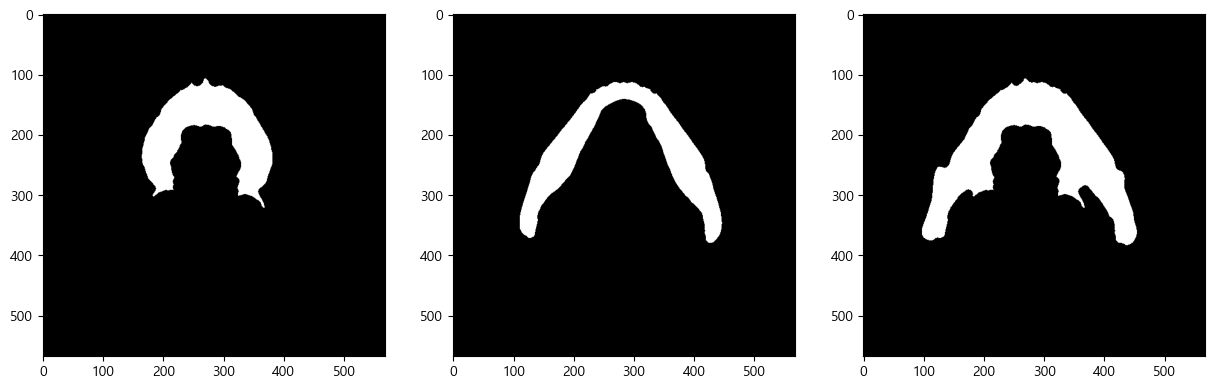

In [28]:
fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(maxilla_close, "gray")
ax[1].imshow(mandible_close, "gray")
ax[2].imshow(tmp_close,"gray")

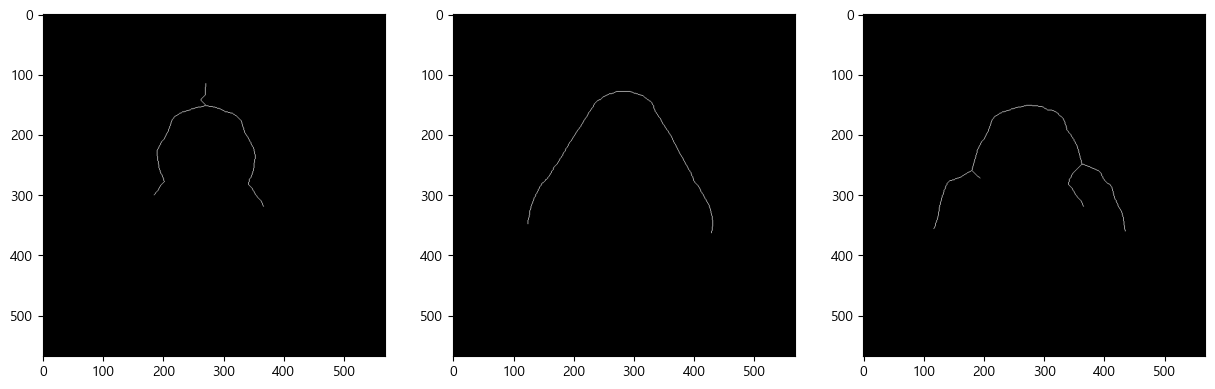

In [29]:
maxilla_skeleton = extract_skeleton(maxilla_close)
mandible_skeleton = extract_skeleton(mandible_close)
tmp_skeleton = extract_skeleton(tmp_close)

fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(maxilla_skeleton, "gray")
ax[1].imshow(mandible_skeleton, "gray")
ax[2].imshow(tmp_skeleton,"gray")

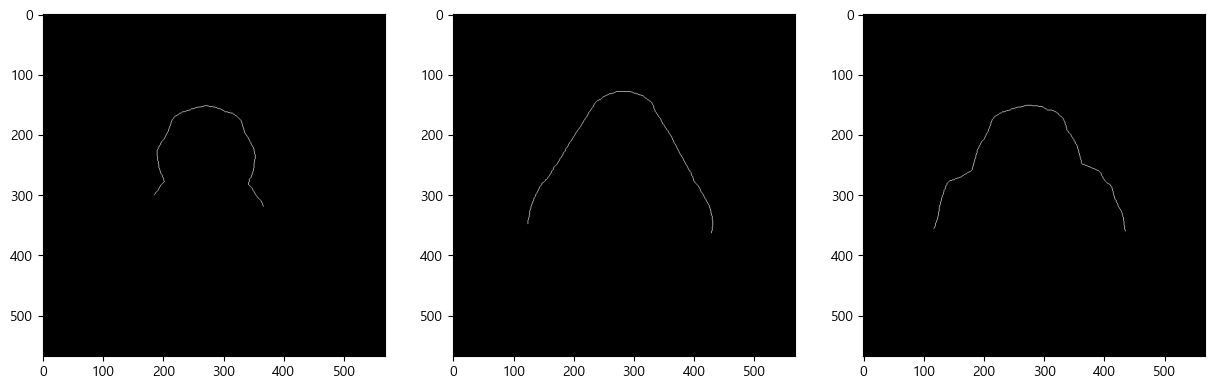

In [30]:
maxilla_curve = find_longest_path(maxilla_skeleton)
mandible_curve = find_longest_path(mandible_skeleton)
tmp_curve = find_longest_path(tmp_skeleton)

fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(maxilla_curve, "gray")
ax[1].imshow(mandible_curve, "gray")
ax[2].imshow(tmp_curve, "gray")

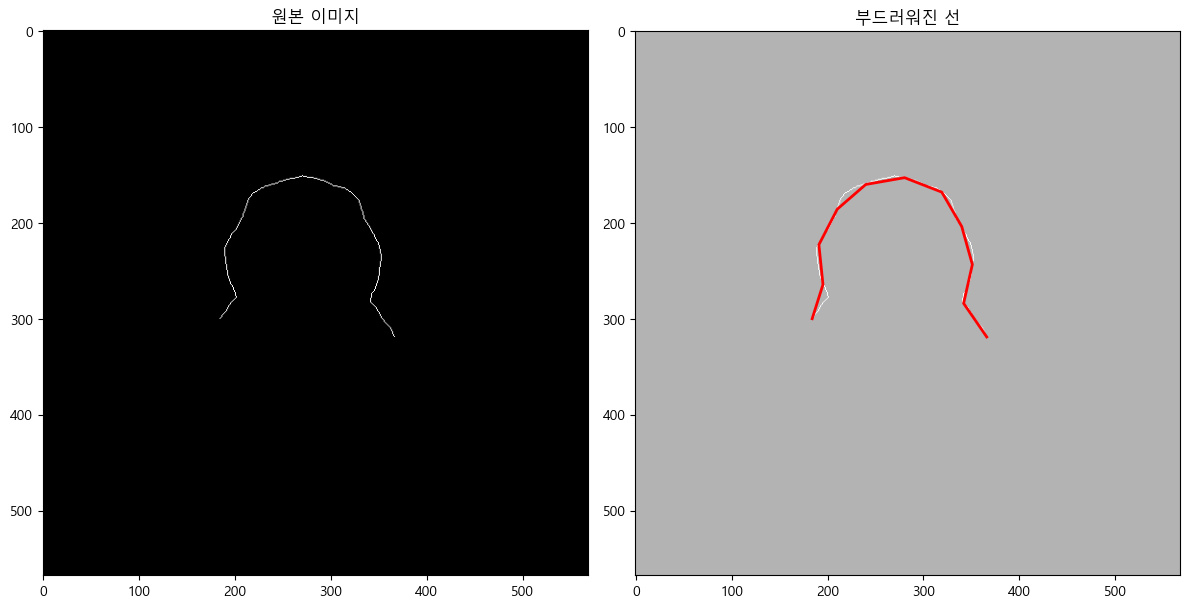

In [31]:
x_smooth, y_smooth = smooth_binary_line(maxilla_curve, num_points=11)
visualize_results(maxilla_curve, x_smooth, y_smooth)

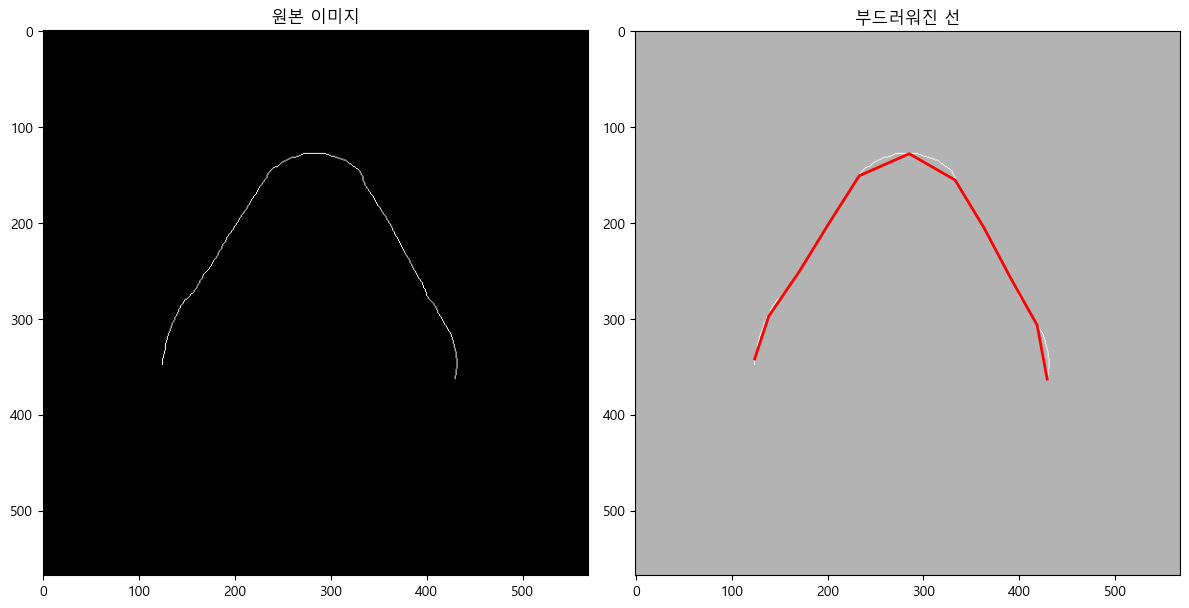

In [33]:
x_smooth, y_smooth = smooth_binary_line(mandible_curve, num_points=11)
visualize_results(mandible_curve, x_smooth, y_smooth)

In [ ]:
x_smooth, y_smooth = smooth_binary_line(tmp_curve, num_points=11)
visualize_results(tmp_curve, x_smooth, y_smooth)